# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder, f´() : callable
        The derivative of `f`.
    x0,x(r) : float 
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.      
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    # According to the Newton's iteration ;
    # x(r+1) = x(r) - ( f(x(r)) / f'(x(r)))

    x = x0 - (f(x0)/fder(x0))
    niter = 0

    while (abs(x-x0) > eps):
      x0 = x
      x = x0 - (f(x0)/fder(x0))
      niter += 1

      if niter > maxiter:
        break 
    return x, niter


### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
#import os as X_OK
# ... ENTER YOUR CODE HERE ...

# f(x) = x^2 - 1
# f´(x) = 2x

f = lambda x: x**2 - 1
fder = lambda x: 2*x

root, niter = newton_iteration(f,fder,0.075)
print("Root = ",root)
print("Number of iterations = ",niter)

Root =  1.0
Number of iterations =  7


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...
def new_newton_iteration(f1, fder, fder2, m, x0, eps=1e-5, maxiter=1000):

  def f(x):
    f = eval(f1)
    return f

  def df_1(x):
    df_1 = eval(fder)
    return df_1

  def df_2(x):
    df_2 = eval(fder2)
    return df_2

# x(r+1) = x(r) - (m * ( f(x(r)) / f'(x(r))))
  for niter in range (0, maxiter):

    d_x = - m * ( f(x0) / df_1(x0) )
    x0 = x0 + d_x
    x0 = x0

  print("Root = ",x0)
  print("Number of iterations = ", maxiter)

# f(x) = (x^2-1)^2
# f'(x) = 4x(x^2-1)
# f''(x) = 12(x^2)-4

new_newton_iteration("(x**2-1)**2","(4*x)*(x**2-1)","12*(x**2-1)-4", 1, 10, eps=1e-5, maxiter=1000)


Root =  1.0000000000000002
Number of iterations =  1000


In [ ]:
new_newton_iteration("(x**2-1)**2","(4*x)*(x**2-1)","12*(x**2-1)-4", 5, 10, eps=1e-5, maxiter=1000)

Root =  1.5075357794587854
Number of iterations =  1000


In [ ]:
new_newton_iteration("(x**2-1)**2","(4*x)*(x**2-1)","12*(x**2-1)-4", 7, 10, eps=1e-5, maxiter=1000)

Root =  -4.000604170430027
Number of iterations =  1000


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

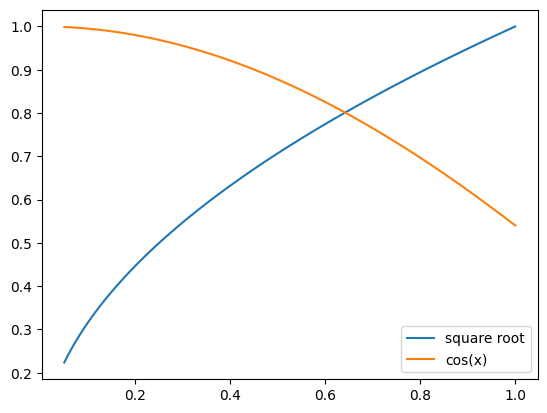

In [ ]:
# ... ENTER YOUR CODE HERE ...
import numpy
import matplotlib.pyplot as plt

x = numpy.linspace(0.05, 1, 100)

plt.plot(x, numpy.sqrt(x), label='square root')
plt.plot(x, numpy.cos(x), label='cos(x)')

plt.legend()

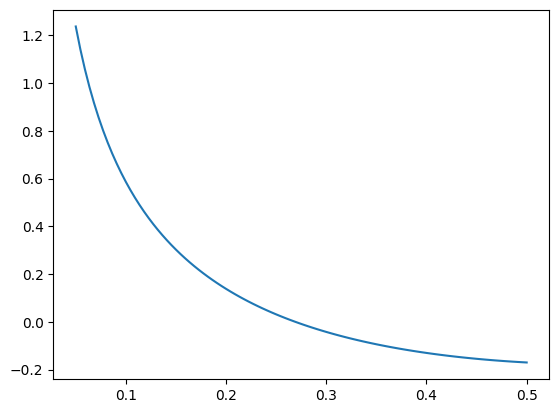

In [ ]:
# f(x) = sqrt(x) - cos(x)
# f´(x) = (1/2*sqrt(x)) - cos(x)

f = lambda x: numpy.sqrt(x) - numpy.cos(x)
fder = lambda x: (1/(2*numpy.sqrt(x))) - numpy.cos(x)

x = numpy.linspace(0.05, 0.5, 100)

plt.plot(x, fder(x), label="Derivative of the function")

In [ ]:
def newton_fixed_point(f, fder, x0, alpha, eps=1e-5, maxiter=1000):
    
    x = x0 - alpha * f(x0)
    niter = 0
    
    while (abs(x - x0) > eps): 
        x0 = x
        x = x0 - alpha * f(x0)
        niter += 1 
        
        if niter > maxiter: 
            x = 'Nan'
            break
    
    return x, niter

In [ ]:
x0 = 2 / 3

for i in [0.1, 0.5, 1, 1.5]: 
    root, niter = newton_fixed_point(f, fder, x0, i)
    print(i,'|', root,'|', niter)

0.1 | 0.6417846268333629 | 44
0.5 | 0.6417193751949732 | 8
1 | 0.6417136823927276 | 6
1.5 | 0.6417185143046147 | 47


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [ ]:
#f(x) = x^3
#f´(x) = 3x^2

import numpy
import matplotlib.pyplot as plt
import cmath

def newton_iterations_converged(x0):
    
    eps=1e-5
    maxiter=1000
    x = x0 - (x0**3-1)/3*x0**2
    niter = x0
    
    for _ in range(maxiter):

        if(abs(x-niter) <= eps):
            break

        if(abs(x-niter) > 1e2):
            return 0

        niter = x
        x = x - ((x**3-1) / (3*x**2))
        
    if abs(x-cmath.exp(complex(0,2*numpy.pi*1/3)))<abs(x-cmath.exp(complex(0,2*numpy.pi*2/3))):
        return 1

    else :
        return 2

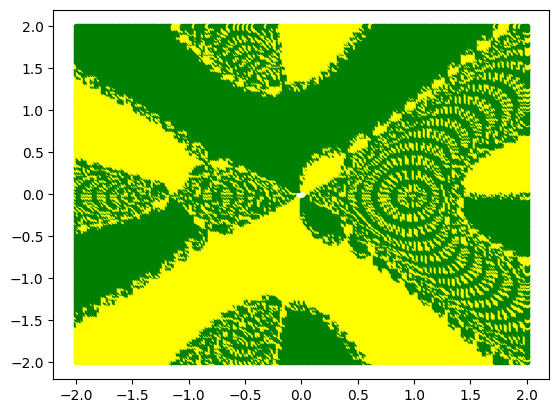

In [ ]:
x = numpy.linspace(-2, 2, 200)
y = numpy.linspace(-2, 2, 200)

for x0 in x:
    for y0 in y:
        fr = newton_iterations_converged(complex(x0,y0))
        if fr == 1:
            plt.plot(x0, y0, marker='o', markersize=3, color='green')
        elif fr == 2:
            plt.plot(x0, y0, marker='o', markersize=3, color='yellow')
        
roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*numpy.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()
